In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from plotly.subplots import make_subplots

In [3]:
data=pd.read_csv('Data.csv')
ps = pd.read_csv('pesticides.csv')
rf = pd.read_csv('rainfall.csv')
tem= pd.read_csv('temp.csv')
yield_data = pd.read_csv('yield.csv')

In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
data

,Country,Year,avg_rain,avg_temp,Pesticides (tonnes),Item,Yield (hg/ha)
0,Albania,1990,1485,16.37,121.00,Maize,36613
1,Albania,1990,1485,16.37,121.00,Potatoes,66667
2,Albania,1990,1485,16.37,121.00,"Rice, paddy",23333
3,Albania,1990,1485,16.37,121.00,Sorghum,12500
4,Albania,1990,1485,16.37,121.00,Soybeans,7000
...,...,...,...,...,...,...,...
28243,Zimbabwe,2013,657,19.76,2550.07,"Rice, paddy",22581
28244,Zimbabwe,2013,657,19.76,2550.07,Sorghum,3066
28245,Zimbabwe,2013,657,19.76,2550.07,Soybeans,13142
28246,Zimbabwe,2013,657,19.76,2550.07,Sweet potatoes,22222


In [6]:
df=data.groupby(['Country'], sort = True)[['Yield (hg/ha)']].sum().nlargest(10, 'Yield (hg/ha)')

In [7]:
df

,Yield (hg/ha)
Country,
India,327420324
Brazil,167550306
Mexico,130788528
Japan,124470912
Australia,109111062
Pakistan,73897434
Indonesia,69193506
United Kingdom,55419990
Turkey,52263950


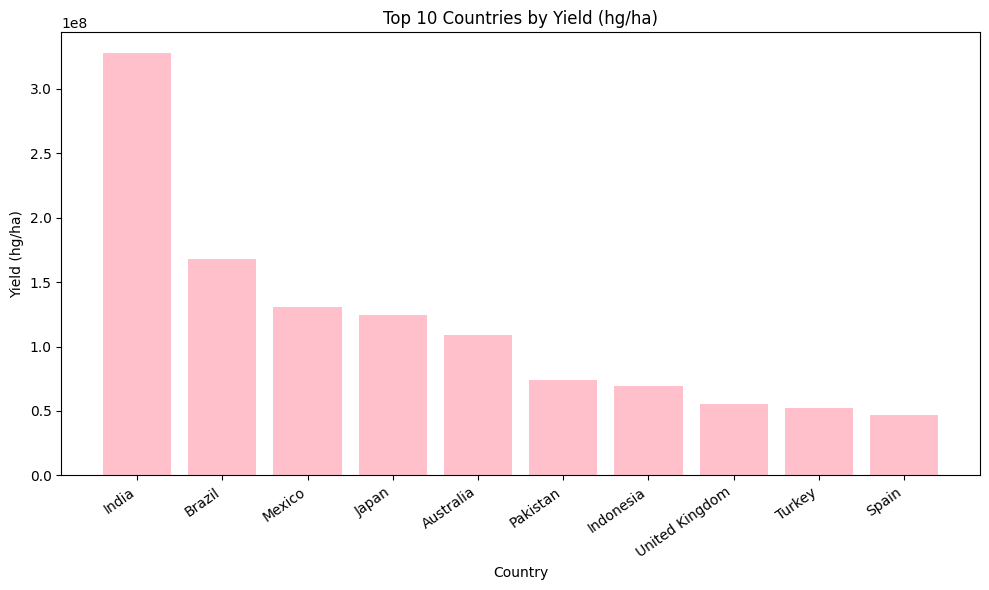

In [8]:
df = df.reset_index()

plt.figure(figsize=(10, 6))
plt.bar(df['Country'], df['Yield (hg/ha)'], color='pink')
plt.title('Top 10 Countries by Yield (hg/ha)')
plt.xlabel('Country')
plt.ylabel('Yield (hg/ha)')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

In [9]:
f1 = px.line(data.groupby(['Year'])['Yield (hg/ha)'].mean(), labels = {'value' : 'Yield (hg/ha)'}) 
f2 = px.line(data.groupby(['Year'])['Pesticides (tonnes)'].mean(), labels = {'value' : 'Pesticides (tonnes)'}) 
f3 = px.line(data.groupby(['Year'])['avg_temp'].mean(), labels = {'value' : 'avg_temp'}) 

In [10]:
f1.show()
f2.show()
f3.show()

In [11]:
px.scatter(data, x = 'Yield (hg/ha)', y = 'Pesticides (tonnes)', color = 'Country', template = 'plotly_dark') 

In [12]:
px.scatter(data, x = 'Item', y = 'Yield (hg/ha)', color = 'Country', template = 'plotly_dark') 


In [13]:
px.scatter(data, x = 'Item', y = 'avg_temp', color = 'Country', template = 'plotly_dark') 


In [14]:
grouped = data.groupby('Item')

top_country = []

for item, group in grouped :
    max_production_row = group[group['Yield (hg/ha)'] == group['Yield (hg/ha)'].max()]
    area = max_production_row['Country'].values[0]
    production = max_production_row['Yield (hg/ha)'].values[0]
    
    
    top_country.append({'Item' : item, 'Country' : area, 'Yield (hg/ha)' : production})

top_areas_df = pd.DataFrame(top_country)

In [15]:
top_areas_df

,Item,Country,Yield (hg/ha)
0,Cassava,India,385818
1,Maize,Qatar,207556
2,Plantains and others,Guatemala,418505
3,Potatoes,Belgium,501412
4,"Rice, paddy",Australia,103895
5,Sorghum,Algeria,206000
6,Soybeans,Turkey,41609
7,Sweet potatoes,Senegal,400000
8,Wheat,Zambia,99387
9,Yams,Mali,250000


In [16]:
px.bar(top_areas_df, x = 'Yield (hg/ha)', y = 'Country', color = 'Item', template = 'plotly_dark')  

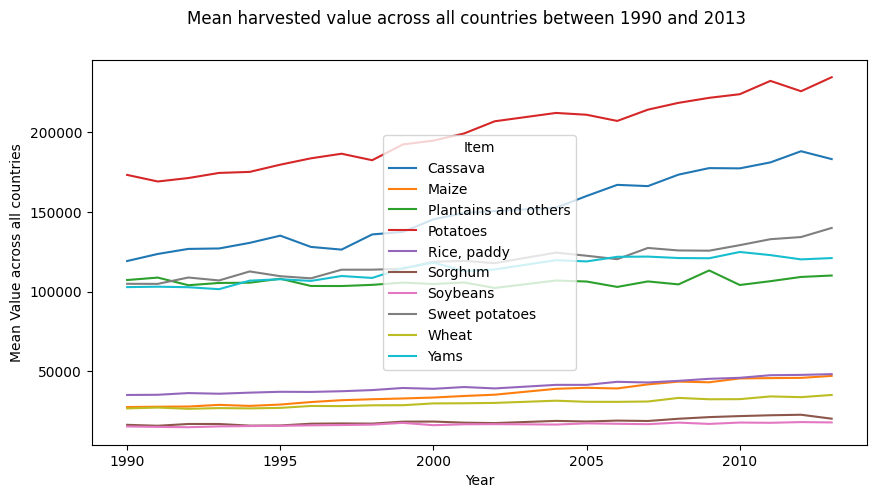

In [17]:
temp_data = data.groupby(['Year', 'Item']).mean()

fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Mean harvested value across all countries between 1990 and 2013')

temp_data['Yield (hg/ha)'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

C:\Users\jaybh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

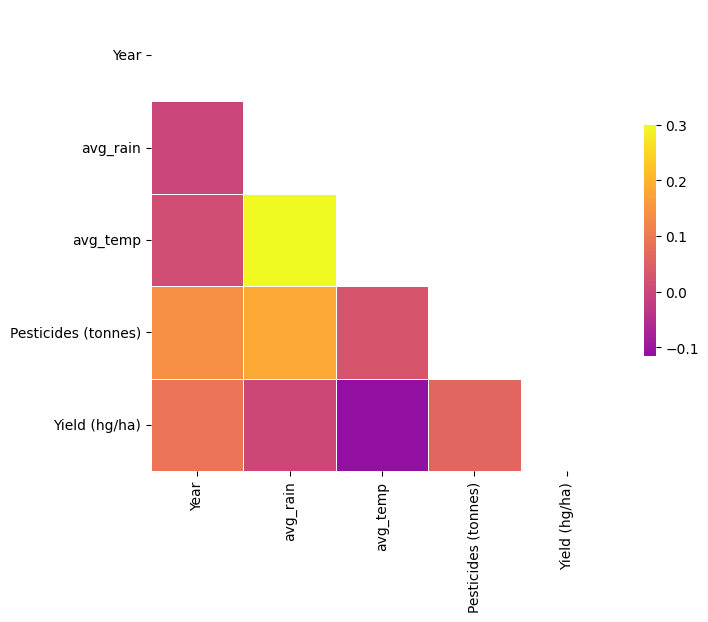

In [18]:
corr = data.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(corr, mask=mask, cmap='plasma', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

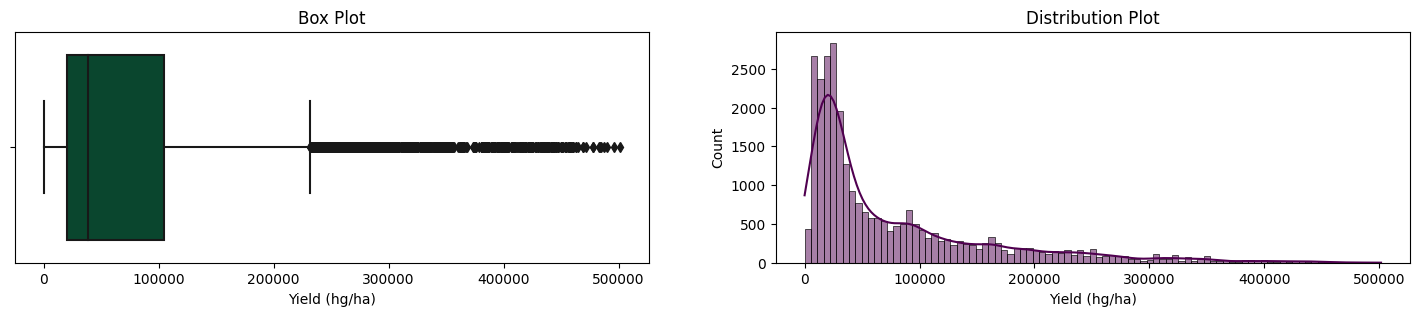

In [19]:
plt.figure(figsize=(18,3))

plt.subplot(1,2,1)
sns.boxplot(x=data['Yield (hg/ha)'],color='#005030')
plt.title(f'Box Plot')

plt.subplot(1,2,2)
sns.histplot(x=data['Yield (hg/ha)'], color='#500050', kde=True)
plt.title(f'Distribution Plot')
plt.show()